## 📌 Problem Statement

In this project, we aim to explore financial and performance trends in the movie industry dataset by answering the following questions:

1. Is there a relationship between Budget and Revenue?
2. Which genre generates the highest average revenue?
3. Does the release period (Holiday vs Normal) affect revenue?
4. Do movies with new actors perform differently compared to experienced actors?
5. How are movies distributed across ROI-based performance categories?


## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading dataset

In [2]:
df = pd.read_csv("Data for repository.csv")

## 🧹 Data Cleaning & Preprocessing

In [3]:
df.head()

,Movie_Name,Release_Period,Whether_Remake,Whether_Franchise,Genre,New_Actor,New_Director,New_Music_Director,Lead_Star,Director,Music_Director,Number_of_Screens,Revenue(INR),Budget(INR)
0,Golden Boys,Normal,No,No,suspense,Yes,No,No,Jeet Goswami,Ravi Varma,Baba Jagirdar,5,5000000,85000
1,Kaccha Limboo,Holiday,No,No,drama,Yes,No,Yes,Karan Bhanushali,Sagar Ballary,Amardeep Nijjer,75,15000000,825000
2,Not A Love Story,Holiday,No,No,thriller,No,No,No,Mahie Gill,Ram Gopal Verma,Sandeep Chowta,525,75000000,56700000
3,Qaidi Band,Holiday,No,No,drama,Yes,No,No,Aadar Jain,Habib Faisal,Amit Trivedi,800,210000000,4500000
4,Chaatwali,Holiday,No,No,adult,Yes,Yes,Yes,Aadil Khan,Aadil Khan,Babloo Ustad,1,1000000,1075000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Movie_Name          1698 non-null   object
 1   Release_Period      1698 non-null   object
 2   Whether_Remake      1698 non-null   object
 3   Whether_Franchise   1698 non-null   object
 4   Genre               1698 non-null   object
 5   New_Actor           1698 non-null   object
 6   New_Director        1698 non-null   object
 7   New_Music_Director  1698 non-null   object
 8   Lead_Star           1698 non-null   object
 9   Director            1698 non-null   object
 10  Music_Director      1698 non-null   object
 11  Number_of_Screens   1698 non-null   int64 
 12  Revenue(INR)        1698 non-null   int64 
 13  Budget(INR)         1698 non-null   int64 
dtypes: int64(3), object(11)
memory usage: 185.8+ KB


In [5]:
df.isnull().sum()

Movie_Name            0
Release_Period        0
Whether_Remake        0
Whether_Franchise     0
Genre                 0
New_Actor             0
New_Director          0
New_Music_Director    0
Lead_Star             0
Director              0
Music_Director        0
Number_of_Screens     0
Revenue(INR)          0
Budget(INR)           0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(2)

In [7]:
df = df.drop_duplicates()

In [8]:
df.describe()

,Number_of_Screens,Revenue(INR),Budget(INR)
count,1696.000000,1.696000e+03,1.696000e+03
mean,553.794811,1.501293e+08,2.379276e+08
std,783.213128,2.435648e+08,6.137708e+08
min,1.000000,3.250000e+05,7.250000e+03
25%,30.000000,1.500000e+07,1.150000e+06
50%,200.000000,5.500000e+07,1.240000e+07
75%,800.000000,1.900000e+08,1.779200e+08
max,4600.000000,2.100000e+09,8.016120e+09


### Dropping Irrelevant Columns

The following columns were removed to focus on financial and performance-related analysis:

- Movie_Name  
- Whether_Remake  
- Whether_Franchise  
- New_Director  
- New_Music_Director  
- Lead_Star  
- Director  
- Music_Director  
- Number_of_Screens  

In [9]:
df = df.drop(['Movie_Name','Whether_Remake','Whether_Franchise','New_Director','New_Music_Director','Lead_Star','Director','Music_Director','Number_of_Screens'] , axis = 1)

## 💰 Feature Engineering

### Calculating ROI Percentage

ROI was calculated using:

ROI = (Revenue - Budget) / Budget * 100

This metric measures profitability instead of just raw revenue.

In [10]:
df["ROI_Percentage"] = ((df["Revenue(INR)"] - df["Budget(INR)"]) / df["Budget(INR)"]) * 100
df["ROI_Percentage"] = df["ROI_Percentage"].round(2)

### Creating Movie Performance Categories

Movies were classified based on ROI percentage into:

- Disaster  
- Flop  
- Below Average  
- Above Average  
- Hit  
- Blockbuster  

This converts financial metrics into business-level performance categories.

In [11]:
bins = [-float("inf"), -50, 0, 20, 50, 150, float("inf")]
labels = ["Disaster", "Flop", "Below Average", "Above Average", "Hit", "Blockbuster"]

df["Movie_Performance"] = pd.cut(
    df["ROI_Percentage"],
    bins=bins,
    labels=labels
)


In [12]:
df.head()

,Release_Period,Genre,New_Actor,Revenue(INR),Budget(INR),ROI_Percentage,Movie_Performance
0,Normal,suspense,Yes,5000000,85000,5782.35,Blockbuster
1,Holiday,drama,Yes,15000000,825000,1718.18,Blockbuster
2,Holiday,thriller,No,75000000,56700000,32.28,Above Average
3,Holiday,drama,Yes,210000000,4500000,4566.67,Blockbuster
4,Holiday,adult,Yes,1000000,1075000,-6.98,Flop


## 📊 Question 1: Is There a Relationship Between Budget and Revenue?

### Approach
- Created scatter plot between Budget and Revenue.
- Observed overall trend pattern.

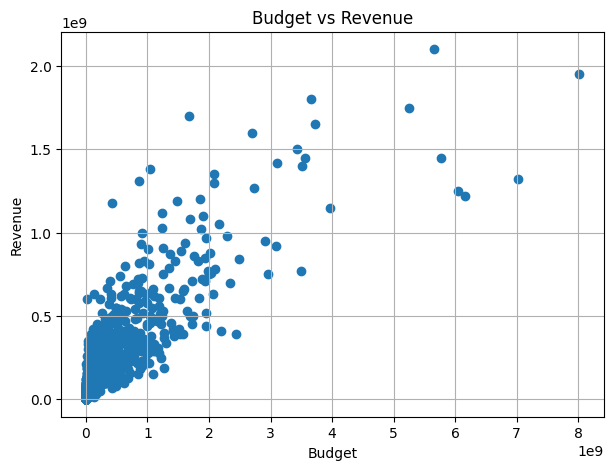

In [13]:
plt.figure(figsize=(7,5))
plt.scatter(df["Budget(INR)"],df["Revenue(INR)"])
plt.title("Budget vs Revenue")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()

### Insight
A positive trend suggests higher budget movies tend to generate higher revenue. However, outliers indicate that high budget does not guarantee success.


## 🎭 Question 2: Which Genre Generates the Highest Average Revenue?

### Approach
- Grouped dataset by Genre.
- Calculated average revenue.
- Visualized results using line plot.

In [14]:
genre = df.groupby(df["Genre"]).agg({"Revenue(INR)" : ["mean"]})
genre.columns = ["Avg_Revenue"]

In [15]:
genre = genre.sort_values(by = "Avg_Revenue",ascending = False)

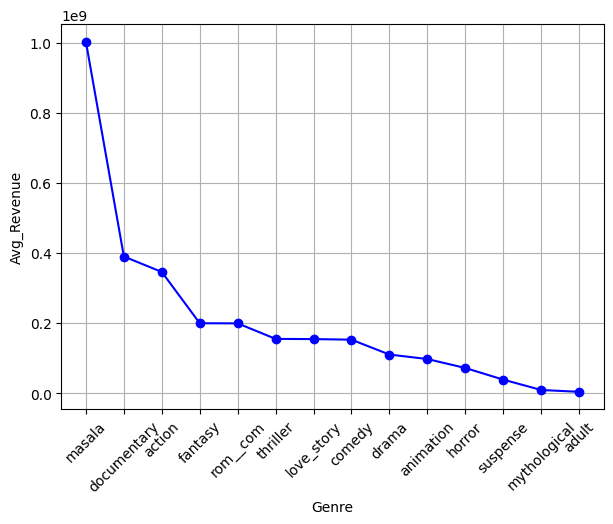

In [16]:
plt.figure(figsize=(7,5))
plt.plot(genre.index,genre["Avg_Revenue"] ,"blue", marker = "o")
plt.xlabel("Genre")
plt.ylabel("Avg_Revenue")
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

### Insight
Genres with higher average revenue indicate stronger per-movie earning potential.

## 🗓 Question 3: Does Release Period Affect Revenue?

### Approach
- Compared revenue distribution using boxplots.

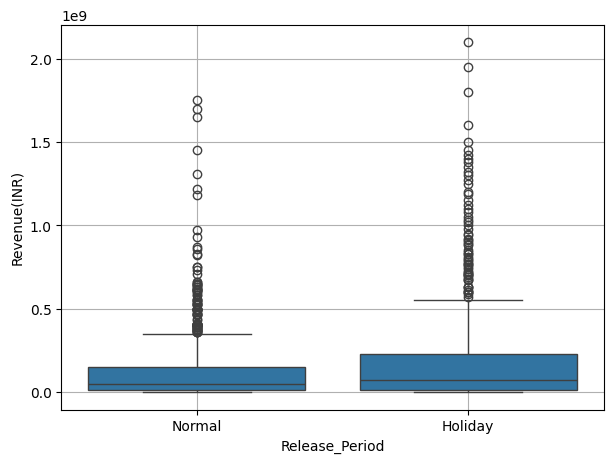

In [17]:
plt.figure(figsize=(7,5))
sns.boxplot(x="Release_Period", y="Revenue(INR)", data=df)
plt.grid(True)
plt.show()

### Insight
Holiday releases may show higher revenue but also greater variability.

## 🌟 Question 4: Do New Actors Perform Differently?

### Approach
- Grouped data by New_Actor.
- Compared average revenue and budget.
- Visualized comparison using pie chart.

In [18]:
new = df.groupby(df["New_Actor"]).agg({"Revenue(INR)" : ["mean"],
                                      "Budget(INR)" : ["mean"]})
new.columns = ["Avg_Revenue" , "Avg_Budget"]

new.index = new.index.map({
    "Yes": "New Actor",
    "No": "Experienced Actor"
})

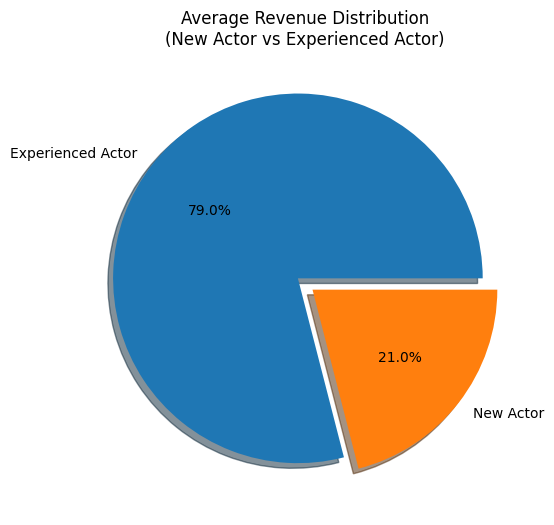

In [19]:
plt.figure(figsize=(6,6))
plt.pie(
    new["Avg_Revenue"],
    labels=new.index,
    autopct="%1.1f%%",
    explode=(0.05, 0.05),
    shadow=True
)
plt.title("Average Revenue Distribution\n(New Actor vs Experienced Actor)")
plt.show()


### Insight
Experienced actors tend to generate higher average revenue, but further analysis is required to assess risk.


## 📈 Question 5: How Are Movies Distributed Across Performance Categories?

### Approach
- Counted movies in each ROI-based performance category.
- Visualized distribution using horizontal bar chart.

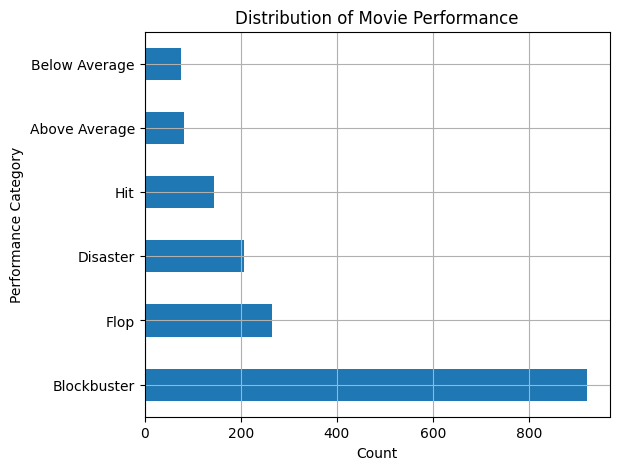

In [20]:
plt.figure(figsize=(6,5))
df['Movie_Performance'].value_counts().plot(kind='barh')
plt.title("Distribution of Movie Performance")
plt.xlabel("Count")
plt.ylabel("Performance Category")
plt.grid(True)
plt.show()

### Insight
The distribution reveals whether the industry is high-risk (more flops/disasters) or stable (more hits/blockbusters).